In [1]:
from os.path import exists

pr_path = '/work/kajiyama/cnn/input/pr/main/pr_coarse_std.npy'
sep_path = '/work/kajiyama/cnn/input/pr/one/1x1/pr_1x1_std_Sep_one.npy'

path_list = [pr_path, sep_path]
for i in path_list:
    print(exists(i))

True
True
True


In [44]:
import numpy as np

pr = np.load(pr_path) #pr[42, 165, 12, 24, 72]
sep = np.load(sep_path) #sep[42, 165]

In [41]:
import bisect

def EFD(data, class_num):
    out = data.copy() # data=(6930)
    out_sorted = np.sort(out)
    if len(data)%class_num != 0:
        print('class_num is wrong')
    else:
        batch_sample = int(len(data)/class_num)
    
    out_bnd = [out_sorted[i] for i in range(0, len(out_sorted), batch_sample)]
    out_class = np.empty(len(out_sorted))
    for i, value in enumerate(out):
        label = bisect.bisect(out_bnd, value) # giving label number
        out_class[i] = int(label - 1)
    
    out_bnd.append(out_sorted[-1])
    out_bnd = np.array(out_bnd)
    out_bnds = np.empty((len(out_bnd) - 1, 2))
    for i in range(len(out_bnds)):
        out_bnds[i, 0] = out_bnd[i]
        out_bnds[i, 1] = out_bnd[i + 1]
    return out_class, out_bnds # out_class=(6930), out_bnds=(class_num+1,2)

In [108]:
import matplotlib.pyplot as plt

def draw_disc(data, class_bnds):
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    ax = plt.subplot()
    ax.hist(y_train, bins=1000, alpha=.5, color='darkcyan')
    
    val_list = []
    for i in class_bnds:
        print(i)
        val_list.append(i[0])
        ax.axvline(i[0], 
                   ymin=0, 
                   ymax=len(data), 
                   alpha=.8,
                   color='salmon')
    ax.axvline(class_bnds[-1, 1],
               ymin=0,
               ymax=len(data),
               alpha=.8,
               color='salmon')

[-1.57322047 -0.48163007]
[-0.48163007 -0.30487773]
[-0.30487773 -0.18539298]
[-0.18539298 -0.08411396]
[-0.08411396  0.00691057]
[0.00691057 0.09855936]
[0.09855936 0.19221701]
[0.19221701 0.30673429]
[0.30673429 0.47070527]
[0.47070527 1.40469476]


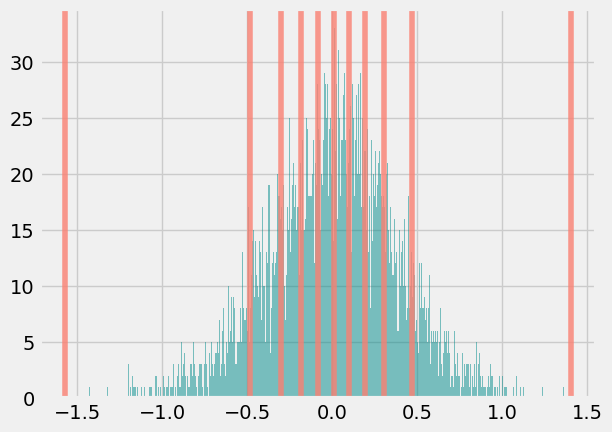

In [114]:
pr_sep = sep.reshape(42*165)
draw_disc(*EFD(pr_sep, 10))

In [123]:
def EWD(data, class_num):
    out = data.copy() # data=(6930)
    lim = max(abs(max(data)), abs(min(data)))
    dx = 2*lim/class_num
    
    out_bnd = []
    out_bnd.append(-lim)
    out_bnd.append(lim)
    if class_num%2 == 0:
        origin = 0
        out_bnd.append(origin)
    else: 
        origin = dx/2
        out_bnd.append(origin)
        out_bnd.append(-origin)
        
    loop_num = int(class_num/2)
    for i in range(loop_num):
        out_bnd.append(origin+dx*(i+1))
        out_bnd.append(-origin-dx*(i+1))
    out_bnd = np.sort(out_bnd)
    
    out_class = np.empty(len(out))
    for i, value in enumerate(out):
        label = bisect.bisect(out_bnd, value) # giving label number
        out_class[i] = int(label - 1)
        
    out_bnd = np.array(out_bnd)
    out_bnds = np.empty((len(out_bnd) - 1, 2))
    for i in range(len(out_bnds)):
        out_bnds[i, 0] = out_bnd[i] # lower boundary
        out_bnds[i, 1] = out_bnd[i+1] # upper boundary
        
    u, counts = np.unique(out_class, return_counts=True)
    return out_class, out_bnds # out_class=(6930), out_bnds=(class_num+1,2)

[-1.57322047 -1.57322047]
[-1.57322047 -1.25857638]
[-1.25857638 -0.94393228]
[-0.94393228 -0.62928819]
[-0.62928819 -0.31464409]
[-0.31464409  0.        ]
[0.         0.31464409]
[0.31464409 0.62928819]
[0.62928819 0.94393228]
[0.94393228 1.25857638]
[1.25857638 1.57322047]
[1.57322047 1.57322047]


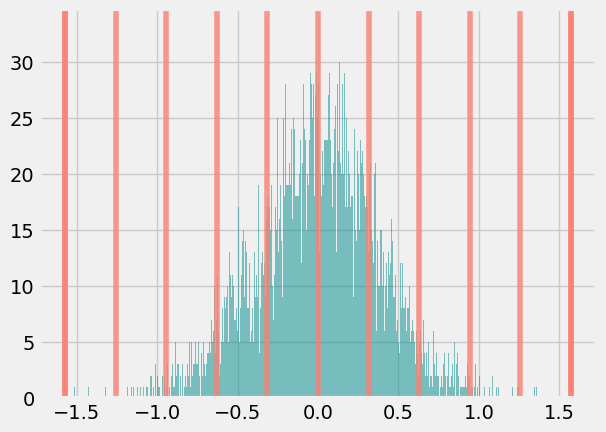

In [133]:
draw_disc(*EWD(pr_sep, 10))

In [134]:
EWD_class, EWD_bnds  = EWD(pr_sep, 10)
u, counts = np.unique(EWD_class, return_counts=True)
print(u, counts)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [   7   57  288  982 2078 2179 1035  263   37    4]
